In [7]:
from ipywidgets import widgets, interact, interact_manual

# Create text widget for output
output_slider_variable = widgets.Text()

# Define function to bind value of the input to the output variable 
def f(x):
    output_slider_variable.value = str(x)

# Create input slider with default value = 10    
# interact(f, x=10)
interact_manual(f, x = widgets.IntSlider(min = 0, max = 80, step = 1, value = 40))

# Display output variable in text box
output_slider_variable

# Create and output new int variable with value of slider
print (output_slider_variable.value)

interactive(children=(IntSlider(value=40, description='x', max=80), Button(description='Run Interact', style=B…


Subscribing to tcp://127.0.0.1:5558

picklePacket received!



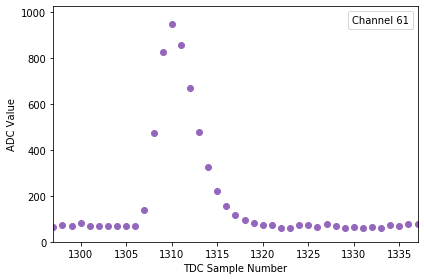

picklePacket received!



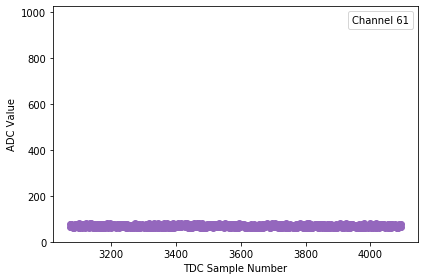

picklePacket received!



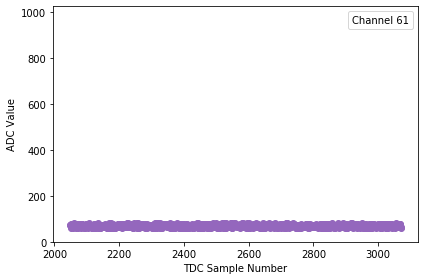

picklePacket received!



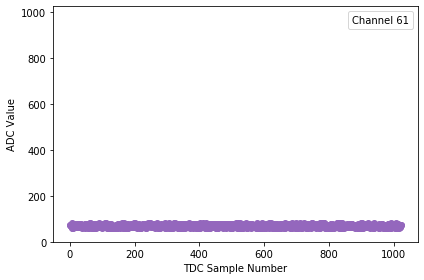

picklePacket received!



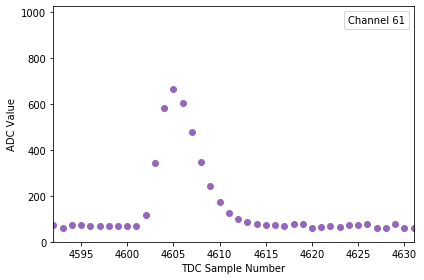

picklePacket received!



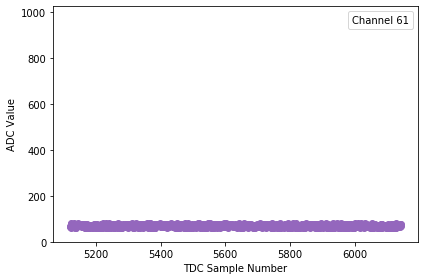

picklePacket received!



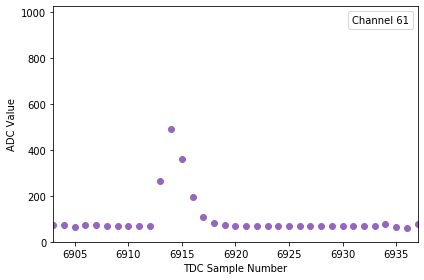

picklePacket received!



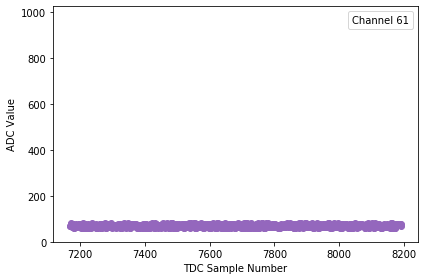

picklePacket received!



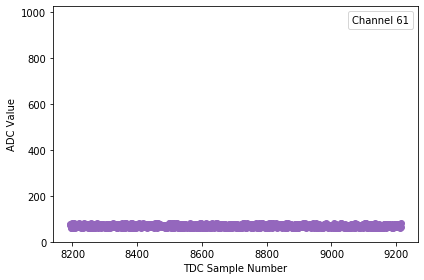

picklePacket received!



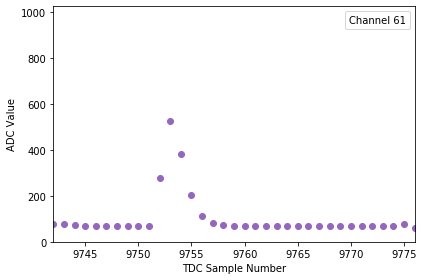

picklePacket received!



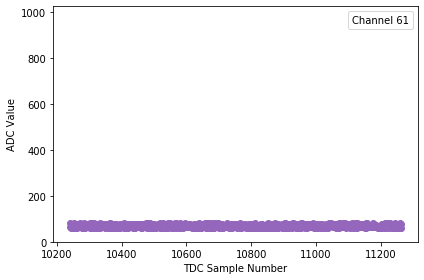

picklePacket received!



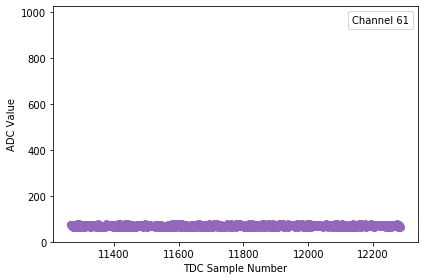

picklePacket received!



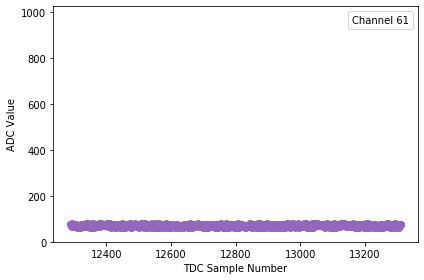

picklePacket received!



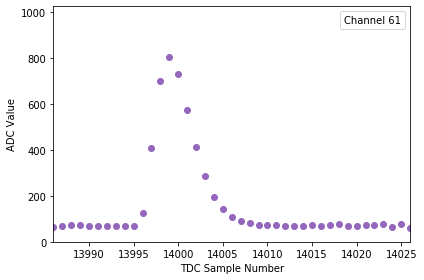

picklePacket received!



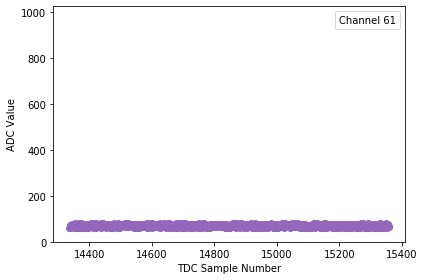

picklePacket received!



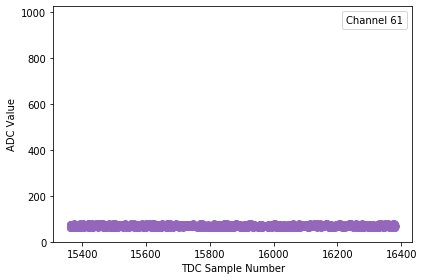

picklePacket received!



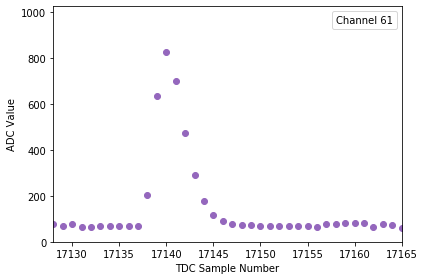

picklePacket received!



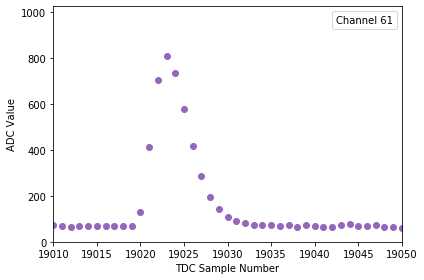

picklePacket received!



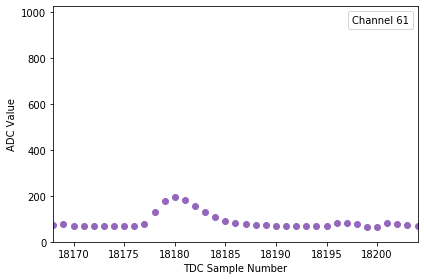

picklePacket received!



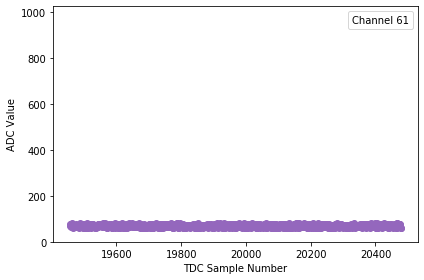

picklePacket received!



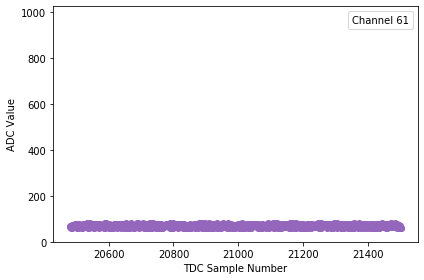

picklePacket received!



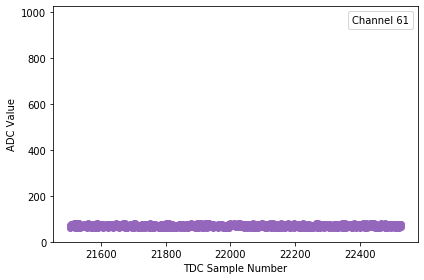

picklePacket received!



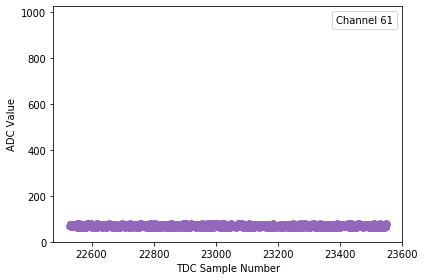

picklePacket received!



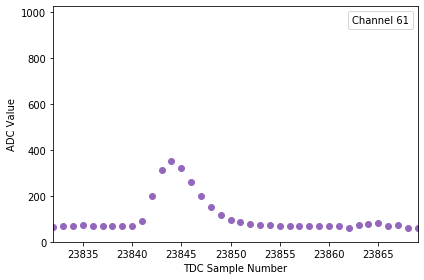

picklePacket received!



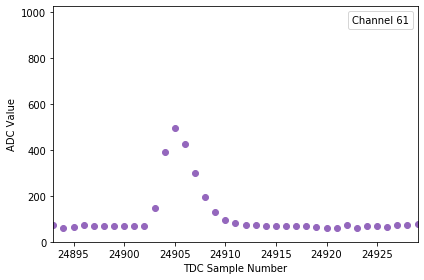

picklePacket received!



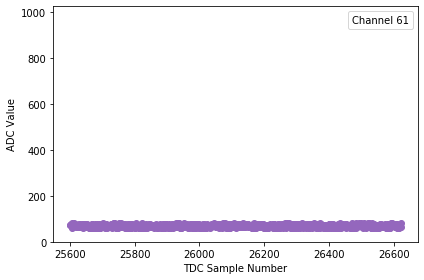

picklePacket received!



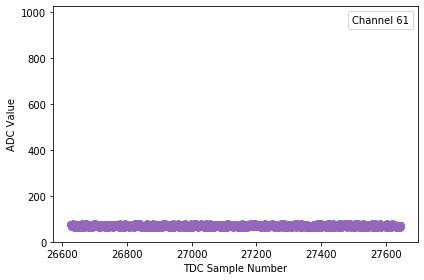

picklePacket received!



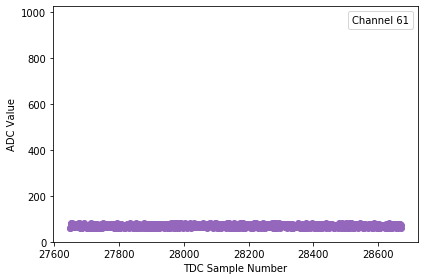

picklePacket received!



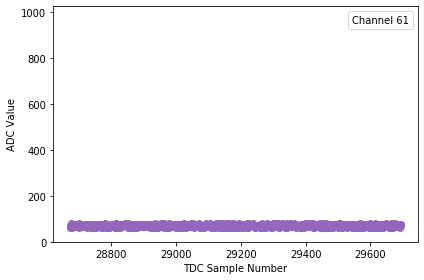

picklePacket received!



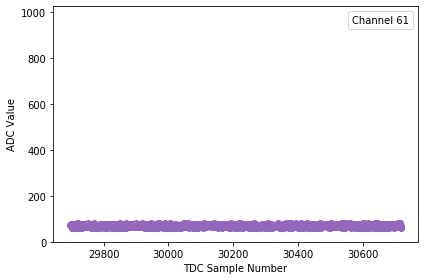

picklePacket received!



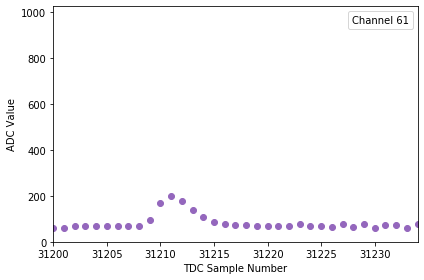

picklePacket received!



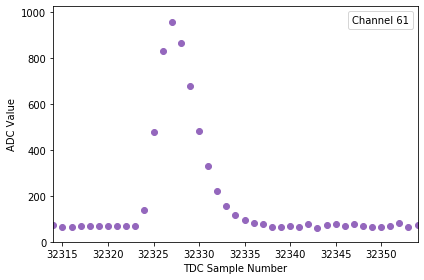

picklePacket received!



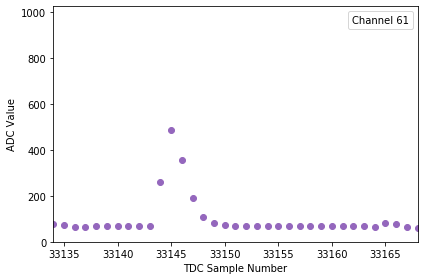

picklePacket received!



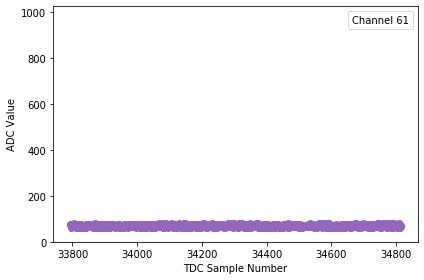

picklePacket received!



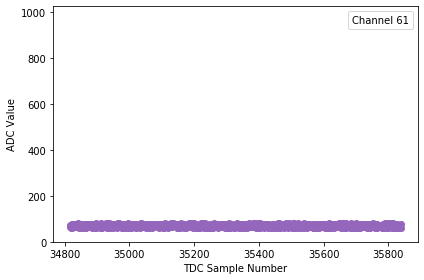

picklePacket received!



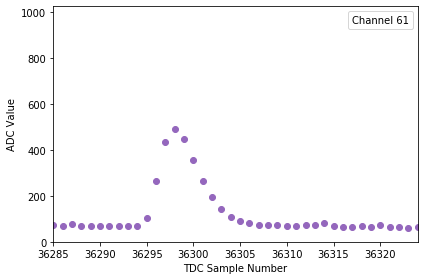

picklePacket received!



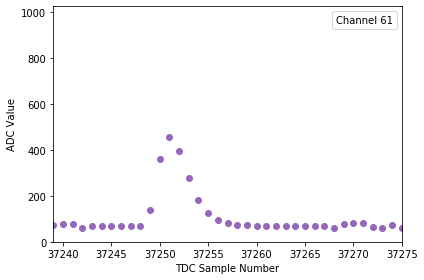

picklePacket received!



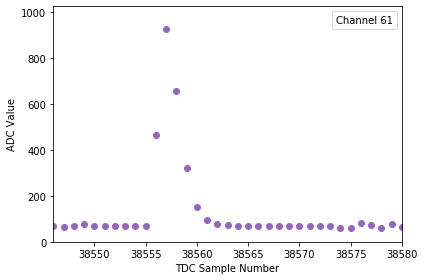

picklePacket received!



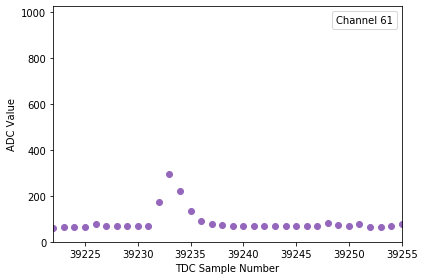

picklePacket received!



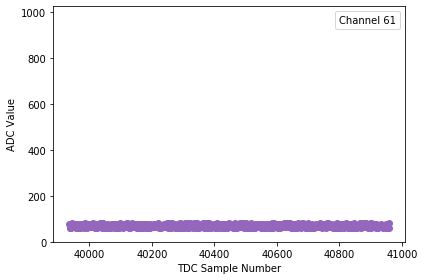

picklePacket received!



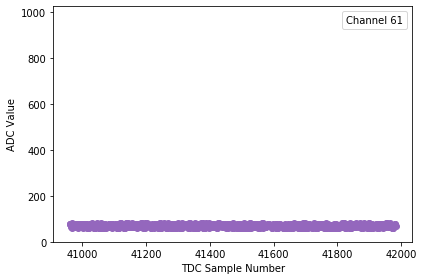

picklePacket received!



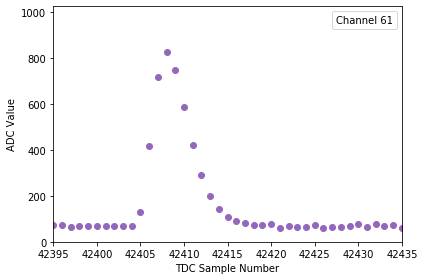

picklePacket received!



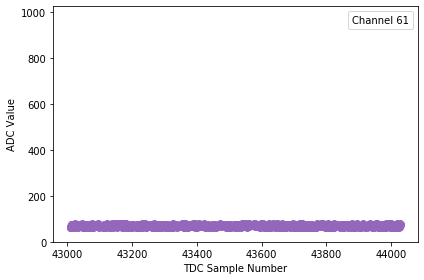

picklePacket received!



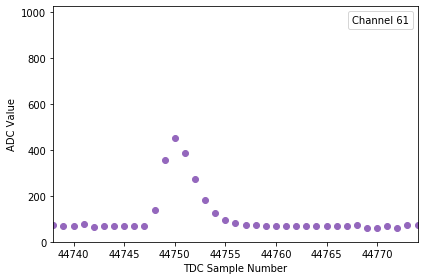

picklePacket received!



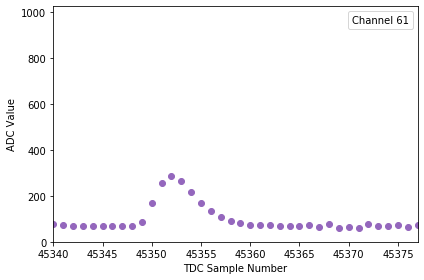

picklePacket received!



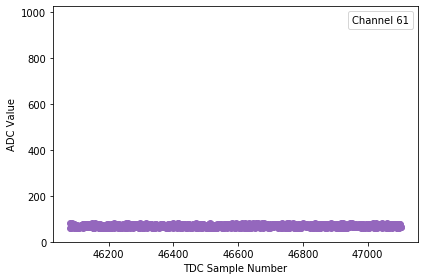

picklePacket received!



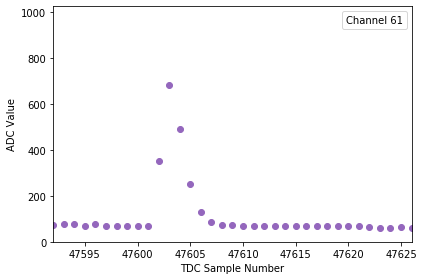

picklePacket received!



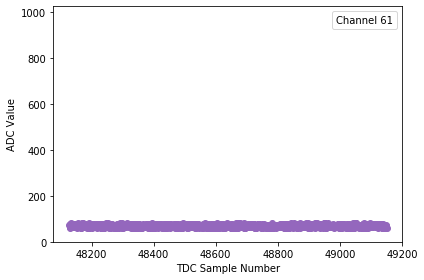

picklePacket received!



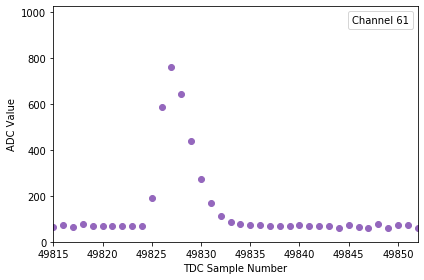

picklePacket received!



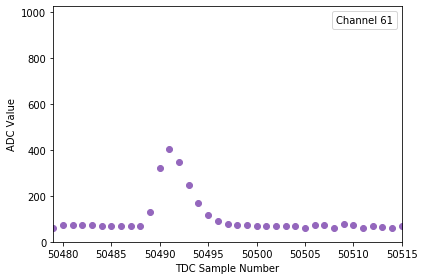

picklePacket received!



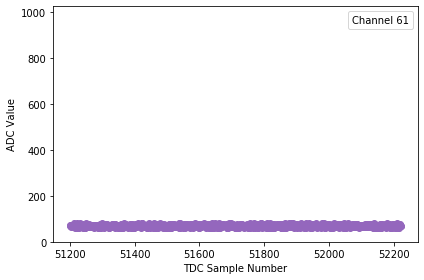

picklePacket received!



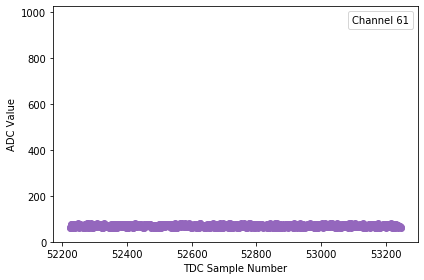

picklePacket received!



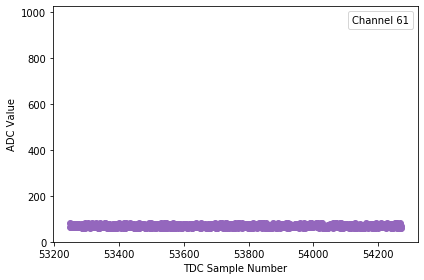

picklePacket received!



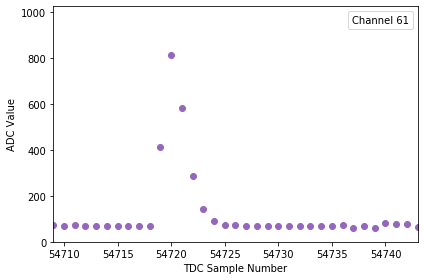

picklePacket received!



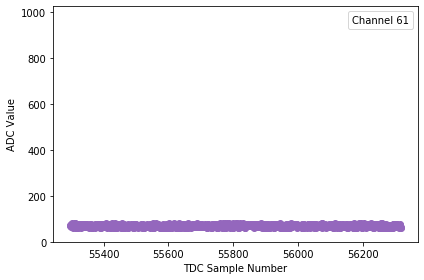

picklePacket received!



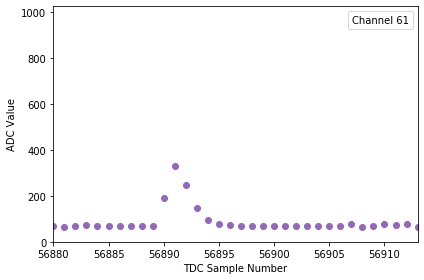

picklePacket received!



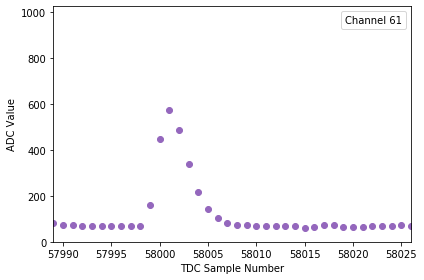

picklePacket received!



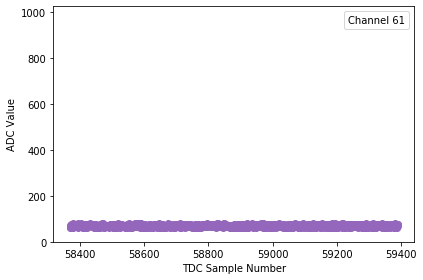

picklePacket received!



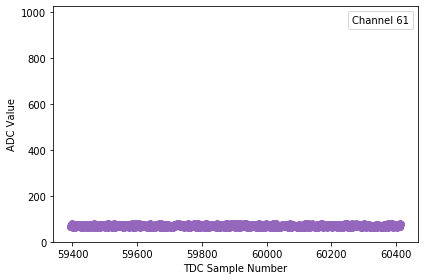

picklePacket received!



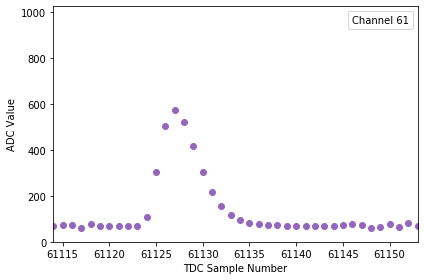

picklePacket received!



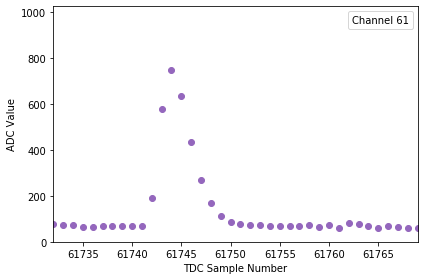

picklePacket received!



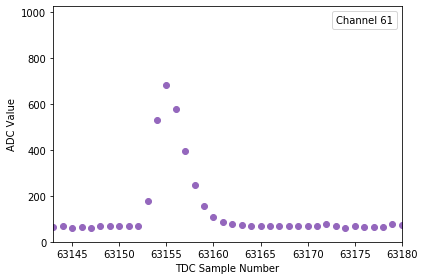

picklePacket received!



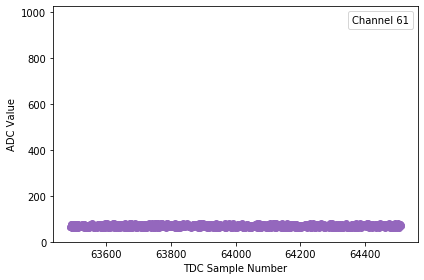

picklePacket received!



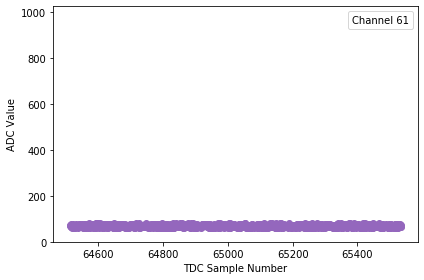

picklePacket received!



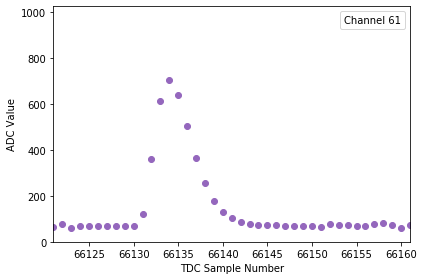

picklePacket received!



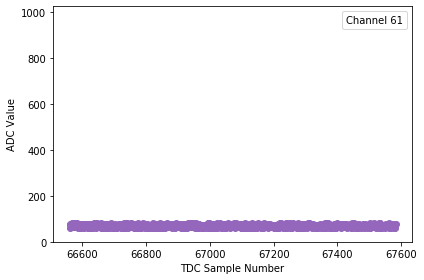

picklePacket received!



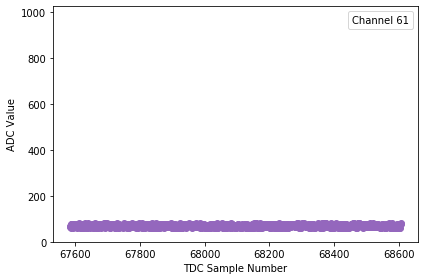

picklePacket received!



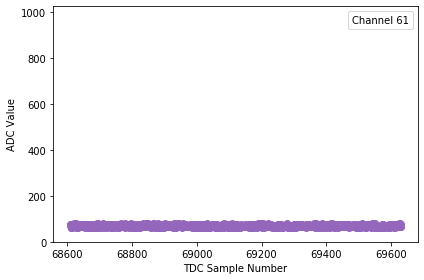

picklePacket received!



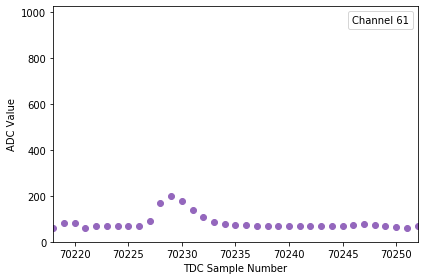

picklePacket received!



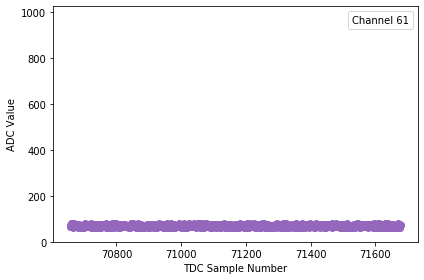

picklePacket received!



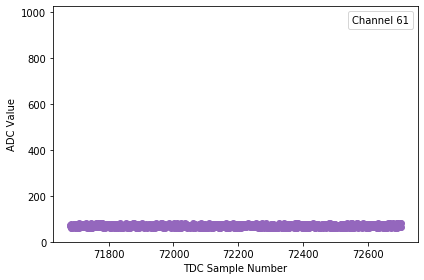

picklePacket received!



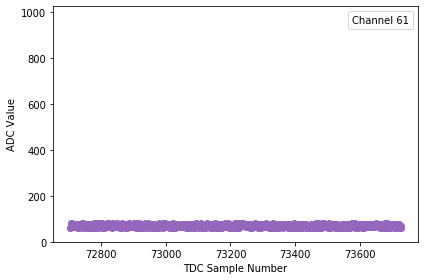

picklePacket received!



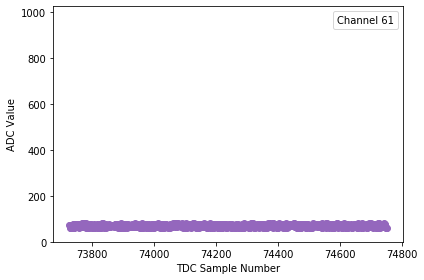

picklePacket received!



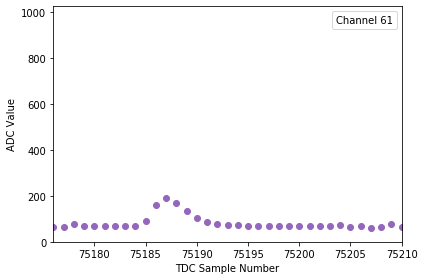

picklePacket received!



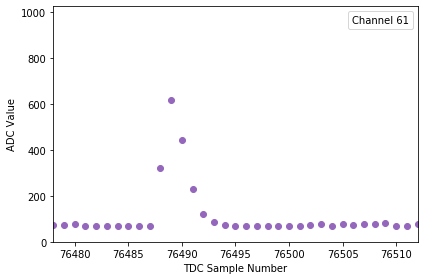

picklePacket received!



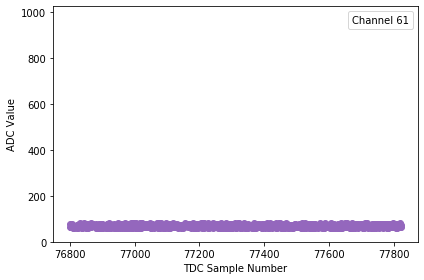

picklePacket received!



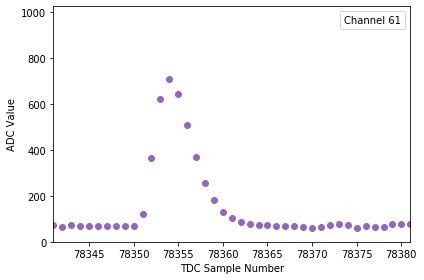

picklePacket received!



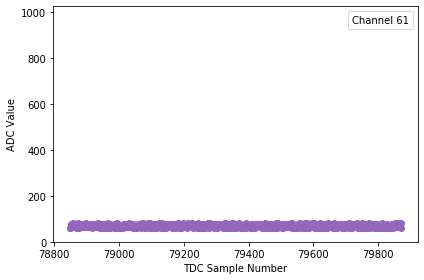

picklePacket received!



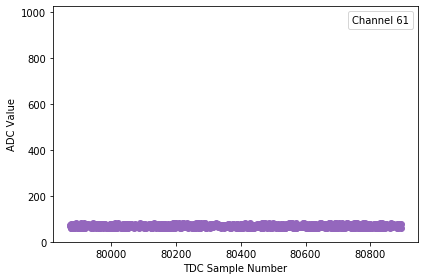

picklePacket received!



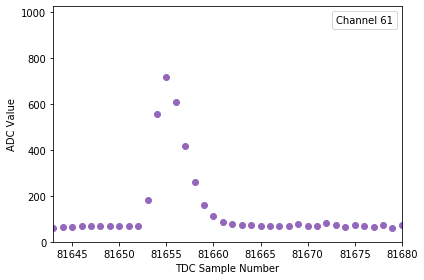

picklePacket received!



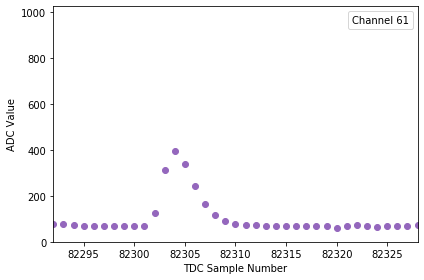

picklePacket received!



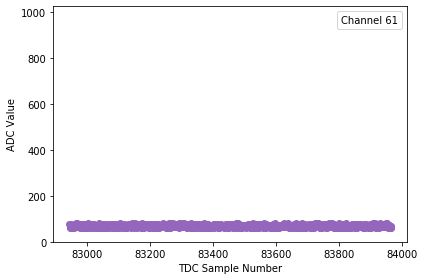

picklePacket received!



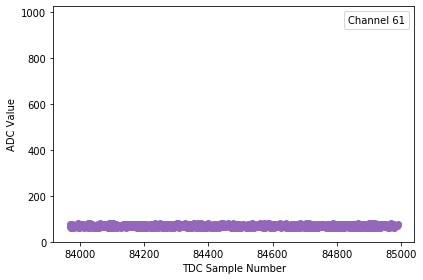

picklePacket received!



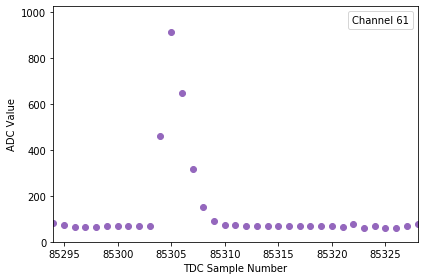

picklePacket received!



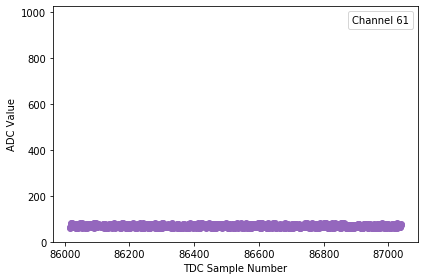

picklePacket received!



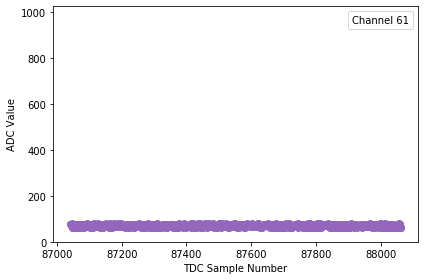

picklePacket received!



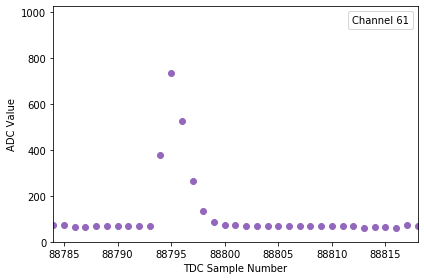

picklePacket received!



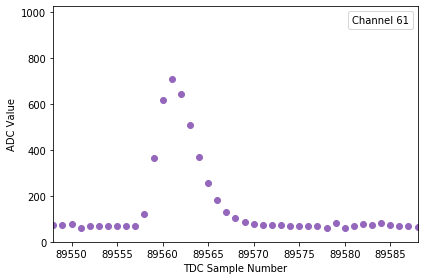

picklePacket received!



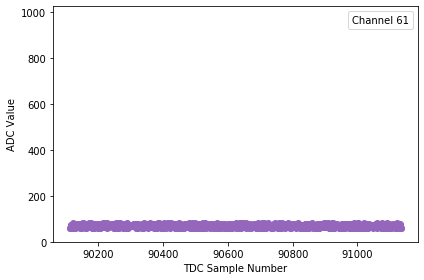

picklePacket received!



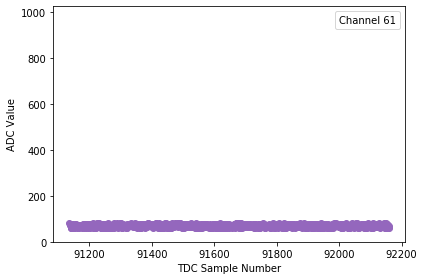

picklePacket received!



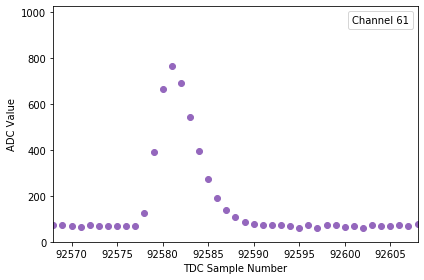

picklePacket received!



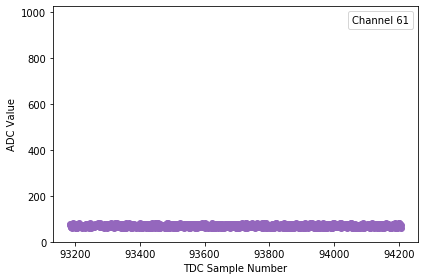

picklePacket received!



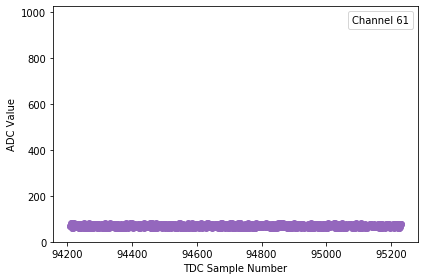

picklePacket received!



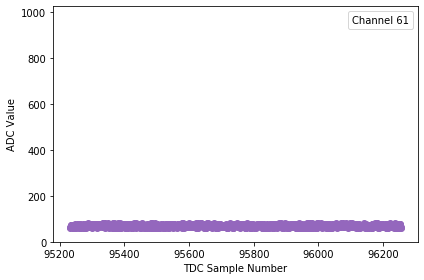

picklePacket received!



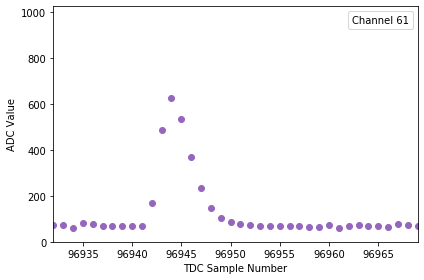

picklePacket received!



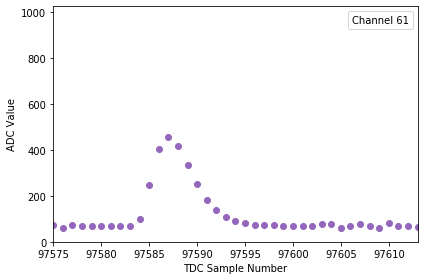

picklePacket received!



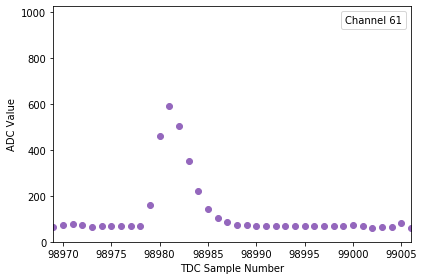

picklePacket received!



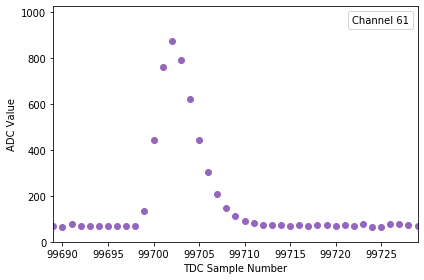

In [ ]:
%matplotlib inline

import zmq, pickle, random
import numpy as np
import matplotlib.pyplot as plt

# define the subscriber port
subPort = 5558
# configure the subscriber
subContext = zmq.Context()
subscriber = subContext.socket(zmq.SUB)
subscriber.setsockopt(zmq.SUBSCRIBE, b'')
subscriber.connect('tcp://127.0.0.1:%d' % subPort)
print('\nSubscribing to tcp://127.0.0.1:%d\n' % subPort)

while True :
    # receive zmq packets from jana subscriber
    picklePacket = subscriber.recv_pyobj()
    print('picklePacket received!\n')
    eventDataDict = pickle.loads(picklePacket)

    userChan = int (output_slider_variable.value)
    tdcData  = eventDataDict['tdcSamplesChan_%d' % userChan]
    adcData  = eventDataDict['adcSamplesChan_%d' % userChan]

    def plotChanScope(userChan, adcData, tdcData) :
        plt.plot(tdcData, adcData, color = 'tab:purple', marker = 'o', ls = '', label = 'Channel %d' % userChan)
        hitLoc = np.where(adcData>100)[0] + np.min(tdcData)
        if len(hitLoc) != 0 : plt.xlim(np.min(hitLoc) - 10, np.max(hitLoc) + 20)
        plt.ylim(0, 1024)
        plt.ylabel('ADC Value')
        plt.xlabel('TDC Sample Number')
        plt.legend(loc = 'best', markerscale = 0, handletextpad = 0, handlelength = 0)

    plotChanScope(userChan, adcData, tdcData)
    plt.tight_layout()
    plt.pause(0.05)